In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings 
warnings.filterwarnings('ignore')

C:\Users\Avanthi\New folder\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df_train = pd.read_csv('Credit_Risk_XTrain.csv')
df_test = pd.read_csv('Credit_Risk_Test_data.csv')
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
df_train.shape

(614, 13)

In [5]:
df_test.shape

(367, 12)

In [6]:
df_train['data'] = 'train'
df_test['data'] = 'test'

In [7]:
df_train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,data
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train


In [8]:
df_test.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,data
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,test
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,test


In [9]:
# Feature Preprocessing
# finding missing values
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
data                  0
dtype: int64

In [10]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
data                  0
dtype: int64

In [11]:
# merge both datasets for feature preprocessing
all_df = pd.concat([df_train, df_test],axis = 0)

In [12]:
all_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,data
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train


In [13]:
all_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,data
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN,test
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN,test
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN,test
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN,test
366,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,NaN,test


In [14]:
all_df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
data                   0
dtype: int64

In [15]:
all_df.shape

(981, 14)

In [16]:
all_df.isnull().sum()/len(all_df)*100

Loan_ID               0.000000
Gender                2.446483
Married               0.305810
Dependents            2.548420
Education             0.000000
Self_Employed         5.606524
ApplicantIncome       0.000000
CoapplicantIncome     0.000000
LoanAmount            2.752294
Loan_Amount_Term      2.038736
Credit_History        8.053007
Property_Area         0.000000
Loan_Status          37.410805
data                  0.000000
dtype: float64

In [17]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 366
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  data               981 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 115.0+ KB


In [18]:
"""Gender-object             
Married-object                 
Dependents-object              
Self_Employed-object          
LoanAmount-float64        
Loan_Amount_Term-float64     
Credit_History-float64""" 

'Gender-object             \nMarried-object                 \nDependents-object              \nSelf_Employed-object          \nLoanAmount-float64        \nLoan_Amount_Term-float64     \nCredit_History-float64'

In [19]:
all_df['Gender'].value_counts()

Gender
Male      775
Female    182
Name: count, dtype: int64

In [20]:
all_df['Married'].value_counts()

Married
Yes    631
No     347
Name: count, dtype: int64

In [21]:
all_df['Dependents'].value_counts()

Dependents
0     545
1     160
2     160
3+     91
Name: count, dtype: int64

In [22]:
all_df['Self_Employed'].value_counts()

Self_Employed
No     807
Yes    119
Name: count, dtype: int64

In [23]:
all_df['Gender'] = all_df['Gender'].fillna('Male')
all_df['Married'] = all_df['Married'].fillna('Yes')
all_df['Dependents'] = all_df['Dependents'].fillna('0')
all_df['Self_Employed'] = all_df['Self_Employed'].fillna('No')

In [24]:
all_df.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
data                   0
dtype: int64

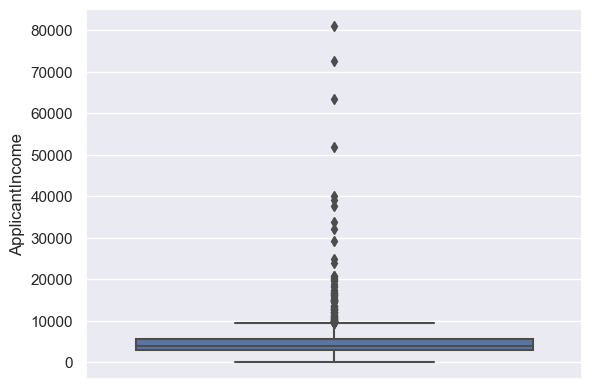

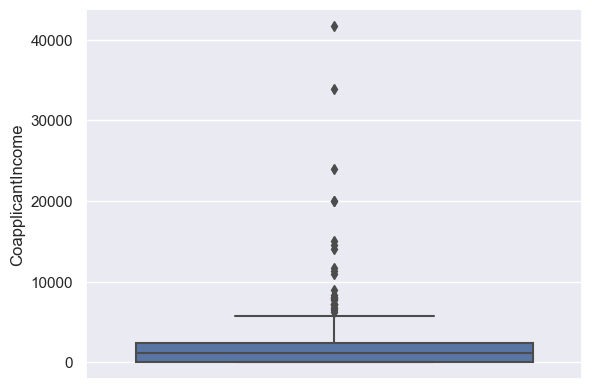

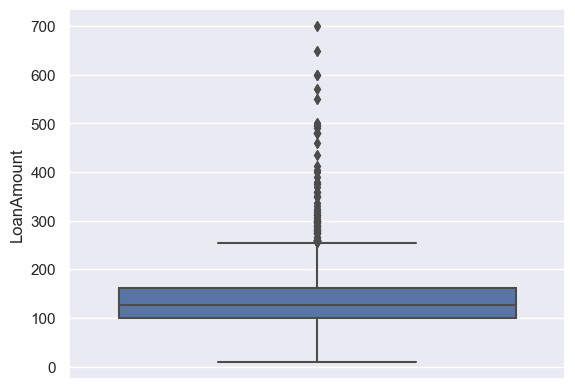

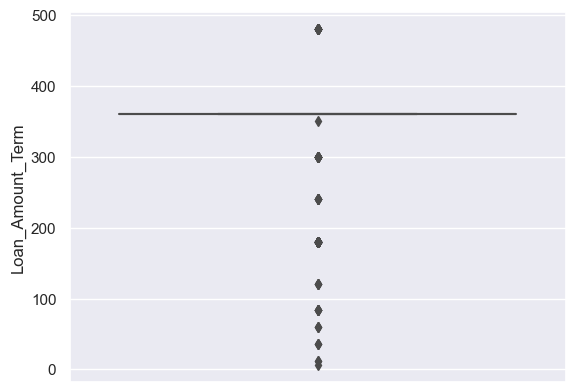

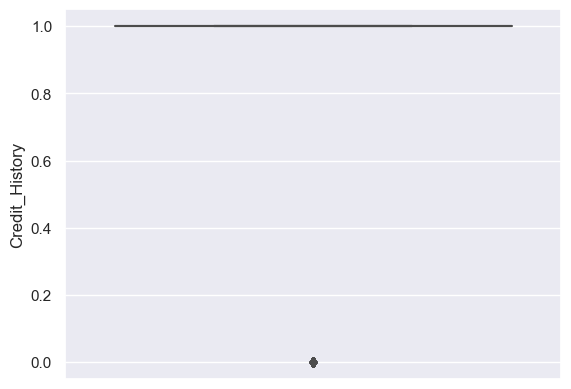

In [25]:
def boxplots(col):
    sns.boxplot(y = all_df[col], data = all_df)
    plt.show()

for i in list(all_df.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [26]:
all_df['Credit_History'].median()

1.0

In [27]:
all_df['LoanAmount'].mean()

142.51153039832286

In [28]:
all_df['LoanAmount'] = all_df['LoanAmount'].fillna(all_df['LoanAmount'].median())
all_df['Loan_Amount_Term'] = all_df['Loan_Amount_Term'].fillna(all_df['Loan_Amount_Term'].median())
all_df['Credit_History'] = all_df['Credit_History'].fillna(all_df['Credit_History'].median())

In [29]:
all_df.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
data                   0
dtype: int64

In [30]:
all_df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,data
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train


In [31]:
# handling categorical variable----at one go---- one hot encoder(except linear reg)
all_df = pd.get_dummies(all_df, columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area'], drop_first = True, dtype=int)

In [32]:
all_df.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,data,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,126.0,360.0,1.0,Y,train,1,0,0,0,0,0,0,0,1
1,LP001003,4583,1508.0,128.0,360.0,1.0,N,train,1,1,1,0,0,0,0,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,Y,train,1,1,0,0,0,0,1,0,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,Y,train,1,1,0,0,0,1,0,0,1
4,LP001008,6000,0.0,141.0,360.0,1.0,Y,train,1,0,0,0,0,0,0,0,1


In [33]:
train = all_df[all_df['data']=='train']
test = all_df[all_df['data']=='test']

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   ApplicantIncome          614 non-null    int64  
 2   CoapplicantIncome        614 non-null    float64
 3   LoanAmount               614 non-null    float64
 4   Loan_Amount_Term         614 non-null    float64
 5   Credit_History           614 non-null    float64
 6   Loan_Status              614 non-null    object 
 7   data                     614 non-null    object 
 8   Gender_Male              614 non-null    int32  
 9   Married_Yes              614 non-null    int32  
 10  Dependents_1             614 non-null    int32  
 11  Dependents_2             614 non-null    int32  
 12  Dependents_3+            614 non-null    int32  
 13  Education_Not Graduate   614 non-null    int32  
 14  Self_Employed_Yes        614 no

In [35]:
train.shape

(614, 17)

In [36]:
test.shape

(367, 17)

In [37]:
#split the data into independent and dependent variable
x = train.drop(['Loan_ID','data', 'Loan_Status'], axis=1)
y = train['Loan_Status']

In [38]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,126.0,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1


In [39]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [40]:
test =  test.drop(['Loan_ID','Loan_Status', 'data'], axis=1)

In [41]:
#Goal--test data is for prediction. this is to confirm to our stackholders whether to give loan or not
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0.0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
1,3076,1500.0,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1
2,5000,1800.0,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1
3,2340,2546.0,100.0,360.0,1.0,1,1,0,1,0,0,0,0,1
4,3276,0.0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1


In [42]:
x.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,126.0,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0


In [43]:
test.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [44]:
x.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.680782,342.410423,0.855049,0.817590,0.653094,0.166124,0.164495,0.083062,0.218241,0.133550,0.379479,0.328990
std,6109.041673,2926.248369,84.123205,64.428629,0.352339,0.386497,0.476373,0.372495,0.371027,0.276201,0.413389,0.340446,0.485653,0.470229
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,126.000000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
# outlier not required as per domain knowledge
# feature Scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1,1))
x_scaled = scaler.fit_transform(x)

In [46]:
pd.DataFrame(x_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.859023,-1.000000,-0.661360,0.487179,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
1,-0.890340,-0.927617,-0.655572,0.487179,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-0.929499,-1.000000,-0.835022,0.487179,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0
3,-0.939814,-0.886817,-0.678726,0.487179,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0
4,-0.855288,-1.000000,-0.617945,0.487179,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0


In [47]:
test1 = scaler.transform(test)
pd.DataFrame(test1).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.862214,-1.000000,-0.707670,0.487179,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
1,-0.927619,-0.928001,-0.661360,0.487179,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
2,-0.880025,-0.913601,-0.424023,0.487179,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0
3,-0.945826,-0.877793,-0.736614,0.487179,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0
4,-0.922672,-1.000000,-0.800289,0.487179,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0


In [48]:
y.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [49]:
y = np.where(y=='Y',1,0)

In [50]:
pd.DataFrame(y).value_counts()

0
1    422
0    192
Name: count, dtype: int64

In [51]:
# split the data into train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x_scaled, y, test_size = 0.2, random_state=101, stratify=y)

In [52]:
y_train

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,

# Building SVM 
### 1) kernel = 'Linear'
### 2) kernel = 'sigmoid'
### 3) kernel = 'poly'
### 4) kernel = 'rbf' --- universal/ by default method

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# kernel = 'linear'
svc_l = SVC(kernel='linear')
svc_l.fit(x_train, y_train)
y_pred_train_lr = svc_l.predict(x_train)
y_pred_test_lr = svc_l.predict(x_test)
accuracy_score_lr_train = accuracy_score(y_train, y_pred_train_lr)
accuracy_score_lr_test = accuracy_score(y_test, y_pred_test_lr)

# kernel = 'sigmoid'
svc_sg = SVC(kernel='sigmoid')
svc_sg.fit(x_train, y_train)
y_pred_train_sg = svc_sg.predict(x_train)
y_pred_test_sg = svc_sg.predict(x_test)
accuracy_score_sg_train = accuracy_score(y_train, y_pred_train_sg)
accuracy_score_sg_test = accuracy_score(y_test, y_pred_test_sg)

# kernel = 'poly'
svc_p = SVC(kernel='poly')
svc_p.fit(x_train, y_train)
y_pred_train_p = svc_p.predict(x_train)
y_pred_test_p = svc_p.predict(x_test)
accuracy_score_p_train = accuracy_score(y_train, y_pred_train_p)
accuracy_score_p_test = accuracy_score(y_test, y_pred_test_p)

# kernel = 'rbf'
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(x_train, y_train)
y_pred_train_rbf = svc_rbf.predict(x_train)
y_pred_test_rbf = svc_rbf.predict(x_test)
accuracy_score_rbf_train = accuracy_score(y_train, y_pred_train_rbf)
accuracy_score_rbf_test = accuracy_score(y_test, y_pred_test_rbf)

# naive bayes theorm
# GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb=gnb.fit(x_train, y_train)
y_pred_train_gnb=gnb.predict(x_train)
y_pred_test_gnb = gnb.predict(x_test)
accuracy_score_gnb_train = accuracy_score(y_train, y_pred_train_gnb)
accuracy_score_gnb_test = accuracy_score(y_test, y_pred_test_gnb)

# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb=bnb.fit(x_train, y_train)
y_pred_train_bnb=bnb.predict(x_train)
y_pred_test_bnb = bnb.predict(x_test)
accuracy_score_bnb_train = accuracy_score(y_train, y_pred_train_bnb)
accuracy_score_bnb_test = accuracy_score(y_test, y_pred_test_bnb)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_train_rf = rf.predict(x_train)
y_pred_test_rf = rf.predict(x_test)
accuracy_score_rf_test = accuracy_score(y_test, y_pred_test_rf)
accuracy_score_rf_train = accuracy_score(y_train, y_pred_train_rf)

list1 = ['SVM_Linear','SVM_Sigmoid','SVM_Poly','SVM_RBF','GNB','BNB','Random_forest']
list2 = [accuracy_score_lr_test,accuracy_score_sg_test,accuracy_score_p_test,
        accuracy_score_rbf_test,accuracy_score_gnb_test,accuracy_score_bnb_test,accuracy_score_rf_test]
list3 = [accuracy_score_lr_train,accuracy_score_sg_train,accuracy_score_p_train,
        accuracy_score_rbf_train,accuracy_score_gnb_train,accuracy_score_bnb_train,accuracy_score_rf_train]


In [54]:
df_test_accuracy = pd.DataFrame({'Method Used':list1, "Accuracy": list2})
df_train_accuracy = pd.DataFrame({'Method Used':list1, "Accuracy": list3})

In [55]:
df_train_accuracy

,Method Used,Accuracy
0,SVM_Linear,0.806517
1,SVM_Sigmoid,0.741344
2,SVM_Poly,0.812627
3,SVM_RBF,0.808554
4,GNB,0.806517
5,BNB,0.810591
6,Random_forest,1.000000


In [56]:
df_test_accuracy

,Method Used,Accuracy
0,SVM_Linear,0.821138
1,SVM_Sigmoid,0.788618
2,SVM_Poly,0.804878
3,SVM_RBF,0.821138
4,GNB,0.804878
5,BNB,0.821138
6,Random_forest,0.804878


Axes(0.125,0.11;0.775x0.77)


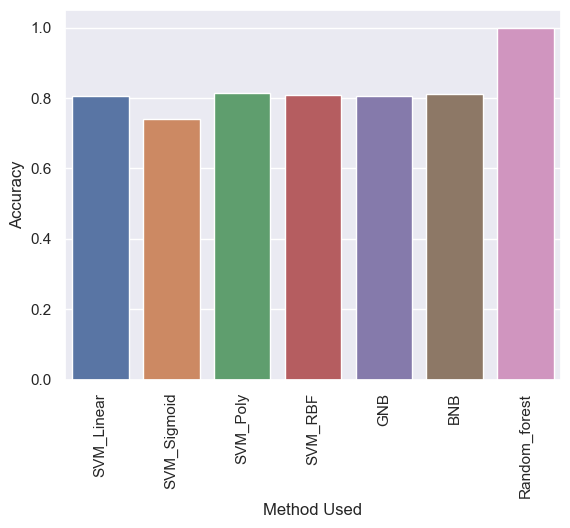

In [57]:
chart = sns.barplot(x='Method Used', y='Accuracy', data=df_train_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)

Axes(0.125,0.11;0.775x0.77)


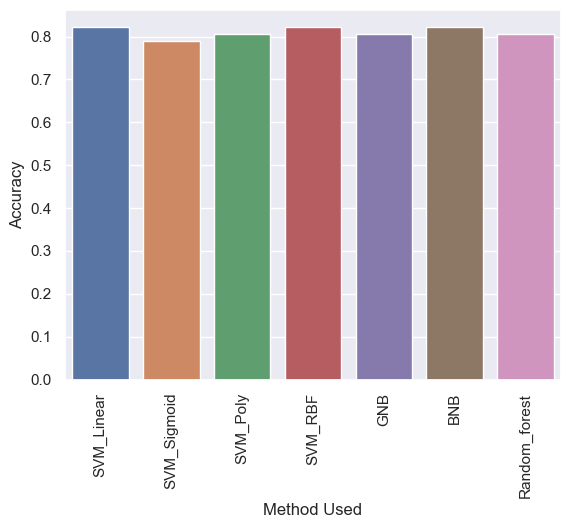

In [58]:
chart = sns.barplot(x='Method Used', y='Accuracy', data=df_test_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)

# SVM--rbf approach

In [59]:
final_output = svc_rbf.predict(test1)
final_output

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [60]:
print(len(final_output))
print(len(test1))

367
367


In [61]:
test1

array([[-0.86221398, -1.        , -0.70767004, ..., -1.        ,
        -1.        ,  1.        ],
       [-0.92761905, -0.92800058, -0.66136035, ..., -1.        ,
        -1.        ,  1.        ],
       [-0.88002474, -0.91360069, -0.42402315, ..., -1.        ,
        -1.        ,  1.        ],
       ...,
       [-0.92331478, -0.90433677, -0.66136035, ..., -1.        ,
         1.        , -1.        ],
       [-0.88002474, -0.88513692, -0.56874096, ..., -1.        ,
        -1.        , -1.        ],
       [-0.77612863, -1.        , -0.74240232, ...,  1.        ,
        -1.        , -1.        ]])

In [62]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0.0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
1,3076,1500.0,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1
2,5000,1800.0,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1
3,2340,2546.0,100.0,360.0,1.0,1,1,0,1,0,0,0,0,1
4,3276,0.0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1


In [63]:
final_output_test = pd.concat([test, pd.DataFrame(final_output)], axis=1)
final_output_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,0
0,5720,0.0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1,1
1,3076,1500.0,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
2,5000,1800.0,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1
3,2340,2546.0,100.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1
4,3276,0.0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777.0,113.0,360.0,1.0,1,1,0,0,1,1,1,0,1,1
363,4158,709.0,115.0,360.0,1.0,1,1,0,0,0,0,0,0,1,1
364,3250,1993.0,126.0,360.0,1.0,1,0,0,0,0,0,0,1,0,1
365,5000,2393.0,158.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1


In [64]:
final_output_test.to_csv("Final_output_for_loan.csv")

In [ ]:
# Principal Component analysis

In [65]:
print(x_train.shape, x_test.shape)

(491, 14) (123, 14)


In [66]:
from sklearn.decomposition import PCA

In [67]:
pca = PCA()
x_train_n = pca.fit_transform(x_train)
x_test_n = pca.fit_transform(x_test)

In [68]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.914830,-0.795234,-0.643994,-0.282051,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,-0.954805,-0.952144,-0.881331,0.487179,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
2,-0.955275,-0.930113,-0.852388,0.230769,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0
3,-0.946073,-0.784674,-0.736614,0.487179,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
4,-0.945999,-0.883985,-0.632417,0.487179,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0


In [69]:
pd.DataFrame(x_train_n).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.218209,-0.545639,0.107277,-0.191649,-1.358310,0.830482,1.092087,0.064144,-0.865833,-0.465820,0.744498,0.072405,0.102011,-0.000394
1,-1.272381,-0.775788,-0.412115,0.059339,-0.428305,-0.138031,-0.368691,-0.111653,0.331482,-0.525672,0.027064,-0.291884,-0.014713,0.027649
2,1.648669,-1.094371,0.948112,-1.180666,1.241278,0.319708,-0.796813,0.382480,-0.008003,0.163283,0.094465,-0.130926,0.003507,0.021972
3,-1.510127,0.143893,-0.590654,0.234643,0.264845,0.791402,-0.701379,-1.220786,-0.232967,-0.451478,0.012039,-0.083109,0.161296,0.035743
4,1.521473,-0.455514,-0.495625,0.034004,-0.371730,-0.046223,-0.391662,-0.342653,0.402018,-0.532913,-0.112092,-0.064389,0.040566,-0.050780


In [70]:
pd.DataFrame(x_test).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.944886,-1.000000,-0.892909,0.487179,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,-0.938776,-0.700002,-0.484805,0.487179,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-0.776970,-1.000000,-0.319826,0.487179,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
3,-0.919159,-1.000000,-0.635311,0.487179,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,-0.873840,-1.000000,-0.753980,0.487179,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0


In [71]:
pd.DataFrame(x_test_n).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.430404,1.825023,0.630855,-0.343691,-0.295838,0.780064,0.614152,-0.959966,0.126078,-0.152550,-0.270878,-0.049189,0.082885,-0.014383
1,-0.126337,-0.458654,-0.251400,-0.654803,-0.295094,-0.321149,0.567710,-0.573401,-0.218131,-0.615056,0.028865,-0.021926,-0.106772,0.167462
2,-1.161379,1.562908,-0.068914,-0.311489,-0.231879,-0.400783,-0.353744,0.417778,-0.551262,0.240937,0.340709,0.021896,-0.105728,-0.054998
3,0.428049,1.818499,0.612221,-0.337479,-0.300536,0.777022,0.619970,-0.979473,0.132511,-0.142555,-0.046343,-0.016714,-0.034890,-0.039995
4,-1.464930,-0.096026,-0.785231,-0.806330,-0.287761,-0.656075,0.400615,0.420157,1.129591,1.066388,-0.324287,-0.030075,-0.032518,-0.017437


In [72]:
# which all variables are significant after applying PCA method

In [73]:
explained_variance = pca.explained_variance_ratio_

In [76]:
explained_variance

array([0.19997207, 0.17650091, 0.13255542, 0.09350377, 0.08688998,
       0.07439145, 0.0650911 , 0.06179239, 0.05130325, 0.03260431,
       0.01134702, 0.00887097, 0.00418762, 0.00098974])

In [77]:
pca_9 = PCA(n_components = 9)
x_train_9 = pca_9.fit_transform(x_train)
x_test_9 = pca_9.fit_transform(x_test)

In [80]:
# kernel = 'rbf'
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(x_train_9, y_train)
y_pred_train_rbf = svc_rbf.predict(x_train_9)
y_pred_test_rbf = svc_rbf.predict(x_test_9)
accuracy_score_rbf_train = accuracy_score(y_train, y_pred_train_rbf)
accuracy_score_rbf_test = accuracy_score(y_test, y_pred_test_rbf)

In [81]:
accuracy_score_rbf_train

0.8126272912423625

In [82]:
accuracy_score_rbf_test

0.6585365853658537